In [1]:
#import tha packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.spatial.distance import cdist

In [2]:
uni=pd.read_csv('C:\\Users\\UCiK\\OneDrive\\Desktop\\ds course\\datasets\\Universities.csv')

In [3]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [4]:
del uni['Univ']

In [5]:
df = uni-uni.min()/uni.max()-uni.min() # normalize the data 

In [6]:
df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,304.289753,60.72,7.844444,6.76,13999.863091,26.309278
1,409.289753,71.72,10.844444,-0.24,54870.863091,13.309278
2,254.289753,33.72,44.844444,2.76,16321.863091,4.309278
3,304.289753,47.72,9.844444,5.76,22805.863091,20.309278
4,274.289753,54.72,18.844444,6.76,13159.863091,22.309278
5,334.289753,60.72,8.844444,3.76,23457.863091,27.309278
6,309.289753,61.72,15.844444,5.76,22880.863091,27.309278
7,249.289753,45.72,9.844444,5.76,11421.863091,24.309278
8,394.289753,62.72,-0.155556,4.76,30820.863091,29.309278
9,299.289753,46.72,29.844444,0.76,49986.863091,19.309278


# elbow method 
check the k value 

In [11]:
wess=[]
from sklearn.cluster import KMeans

In [12]:
from sklearn.cluster import KMeans
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++",random_state = 0 )
    kmeans.fit(df)
    wess.append(kmeans.inertia_)

C:\Users\UCiK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
wess

[4994156678.48,
 1847817637.25974,
 582713442.3560606,
 278381465.625,
 142348016.29166663,
 95877994.41666664,
 65048691.16666665,
 44233695.249999985,
 32300405.750000004,
 21459093.5]

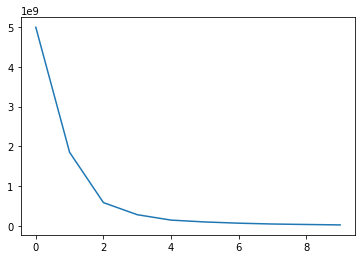

In [15]:
plt.plot(wess)
plt.show()

# creating model 

In [20]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init= 'k-means++' , random_state = 0)
y=model.fit_predict(df)

In [21]:
y

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0])

In [24]:
uni['groups']= pd.Series (y)

In [25]:
uni

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,groups
0,1310,89,22,13,22704,94,1
1,1415,100,25,6,63575,81,0
2,1260,62,59,9,25026,72,1
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,1
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,1
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,0


In [ ]:
unI.to_csv("C:\\Users\\UCiK\\OneDrive\\Desktop\\ds course\\datasets\\Universitie_KMEANSCLUST .csv") # export to pc 